# Interactivity in Matplotlib (Jupyter Notebook)

Why this matters:

  Explore data live (e.g. zoom, sliders).
  Create dashboards, reports, or experiments.
  Integrate with Jupyter, GUIs, and even web apps.

If you're using:

  Jupyter Notebook: %matplotlib notebook enables basic interactivity.
  VS Code / Python script: plt.ion() (interactive mode) works.

'''
What is ipympl?

ipympl is a Python package that helps Matplotlib plots become interactive inside Jupyter notebooks.

Why install ipympl?

  By default, Matplotlib plots in Jupyter are static images — you can't zoom, pan, or interact with them.
  Installing ipympl lets you use the magic command %matplotlib widget, which makes plots interactive.
  This means you can zoom in, pan around, and explore your plots right inside the notebook easily.
'''

In [8]:
pip install ipympl

Note: you may need to restart the kernel to use updated packages.


In [9]:
#Enables interactive figures (zoom, pan, live updates).
%matplotlib widget 

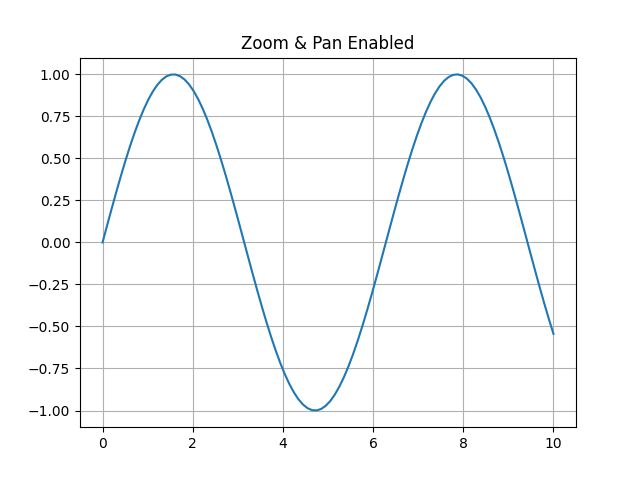

In [10]:
# Interactive Plot (Zoom + Pan)
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.figure()
plt.plot(x, y)
plt.title("Zoom & Pan Enabled")
plt.grid(True)
plt.show()
#You can now zoom, pan, and interact directly in the output cell.

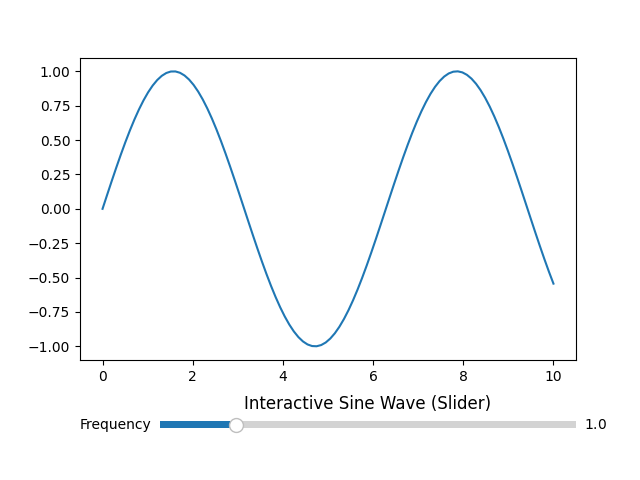

In [11]:
#Slider Widget: Control Plot Dynamically   [Move the slider to change the sine wave live.]
from matplotlib.widgets import Slider
import matplotlib.pyplot as plt
import numpy as np

# Create x data and initial frequency
x = np.linspace(0, 10, 100)
initial_freq = 1
y = np.sin(initial_freq * x)
'''
x: 100 values from 0 to 10 (like time or input values).
initial_freq: starting frequency of the sine wave is 1.
y: sine wave values calculated as sin(freq * x).
'''

# Create plot and adjust bottom for slider
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)
line, = ax.plot(x, y)
'''
fig, ax: creates a figure (fig) and one plot area (ax).
plt.subplots_adjust(bottom=0.25): leaves space at the bottom for the slider.
line, = ax.plot(x, y): plots the sine wave and saves the line object (so we can update it later).
'''

# Create slider axis and widget
ax_slider = plt.axes([0.25, 0.1, 0.65, 0.03])
slider = Slider(ax_slider, 'Frequency', 0.1, 5.0, valinit=initial_freq)
'''
plt.axes([...]): defines position and size of the slider area on the figure.
Format: [left, bottom, width, height] (from 0 to 1).
Slider(...): creates a slider with label "Frequency", range from 0.1 to 5.0, and default value 1.
'''

# Update function to change sine wave frequency
def update(val):
    freq = slider.val
    line.set_ydata(np.sin(freq * x))  # Update y data
    fig.canvas.draw_idle()             # Redraw plot
    '''
    This function runs whenever the slider is moved.
    slider.val: gets the current value from the slider.
    line.set_ydata(...): updates the sine wave with new frequency.
    fig.canvas.draw_idle(): refreshes the plot to show the new wave.
    '''

# Connect slider to update function
slider.on_changed(update)  #Whenever the slider value changes, it runs the update() function.

plt.title("Interactive Sine Wave (Slider)")
plt.show()

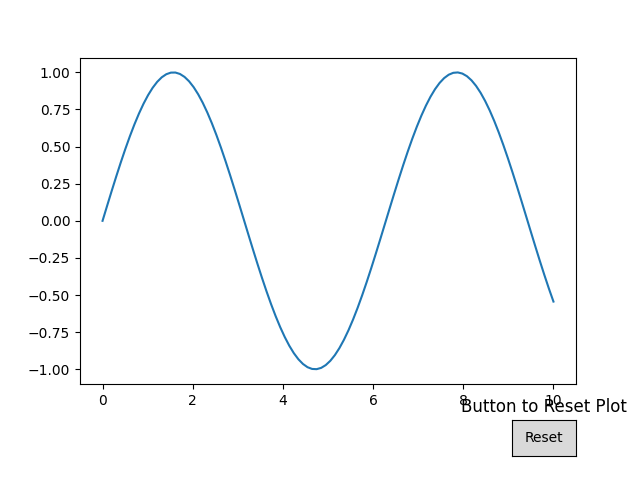

In [12]:
#Button Widget: Trigger Reset  [You can use buttons for reset, save, highlight, etc.]
from matplotlib.widgets import Button
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots()  #creates the figure and a plot area.
plt.subplots_adjust(bottom=0.2) #adds space at the bottom for the button.
x = np.linspace(0, 10, 100)  #creates 100 values from 0 to 10.
line, = ax.plot(x, np.sin(x))  #np.sin(x) – computes sine wave valuesline, = ax.plot(...) – draws the sine wave and stores it in line so we can update it later.

# Add button
ax_button = plt.axes([0.8, 0.05, 0.1, 0.075])
button = Button(ax_button, 'Reset')
'''
plt.axes([...]) – defines the position and size of the button.
Format is [left, bottom, width, height], using values between 0 and 1 relative to the whole figure.
Button(...) – creates a button inside the plot labeled "Reset".
'''

def reset(event):
    line.set_ydata(np.sin(x))
    fig.canvas.draw_idle()
'''
This function is called when you click the button.
It resets the sine wave back to its original values.
line.set_ydata(...) – replaces the current wave values.
fig.canvas.draw_idle() – refreshes the plot to show the reset wave.
'''

button.on_clicked(reset)  #This connects the button to the reset() function.When the button is clicked, the function runs.
plt.title("Button to Reset Plot")
plt.show()

In [9]:
pip install mplcursors

Note: you may need to restart the kernel to use updated packages.


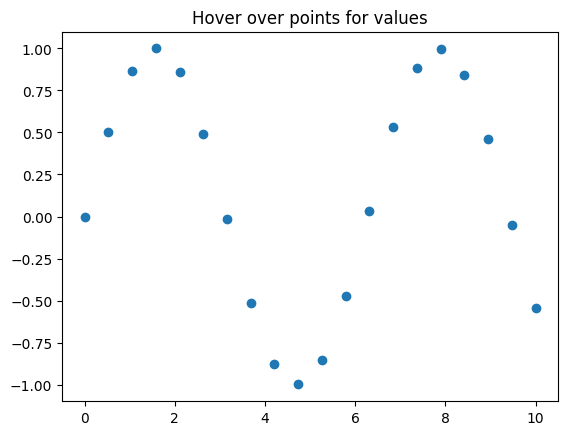

In [7]:
# Hover Tooltips (using mplcursors)  [Hover over points to see their exact (x, y) values.]
import mplcursors  

x = np.linspace(0, 10, 20)
y = np.sin(x)

fig, ax = plt.subplots()
points = ax.plot(x, y, 'o')
mplcursors.cursor(hover=True)

plt.title("Hover over points for values")
plt.show()

'''
Summary Table

| Feature      | Tool/Widget            | Use Case                             |
| ------------ | ---------------------- | ------------------------------------ |
| Zoom & Pan   | `%matplotlib notebook` | Explore dense plots                  |
| Dynamic Plot | `Slider`               | Control signal frequency, scale, etc |
| Action Click | `Button`               | Reset, export, toggle                |
| Tooltip      | `mplcursors`           | Point inspection, debugging          |

'''

# Real-World Case Studies (IoT, ML, Dashboards)

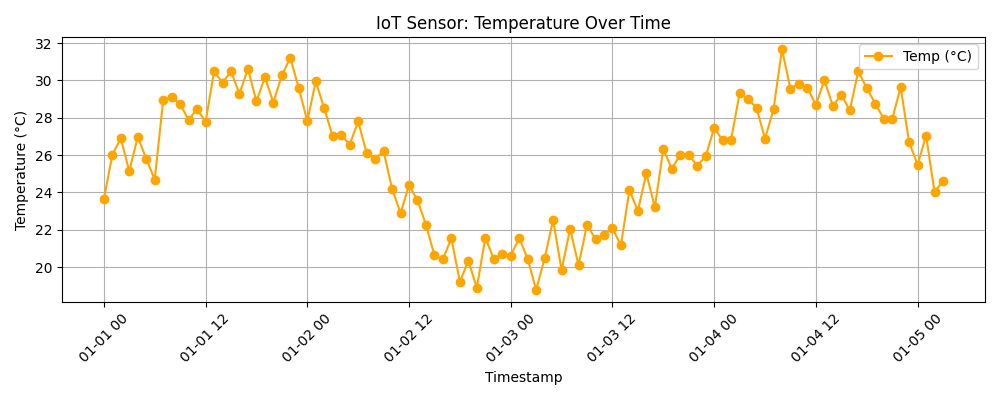

In [16]:
# IoT Sensor Data Visualization
#Scenario: You have temperature readings from a sensor over time. [ Used in home automation, climate monitoring, etc.]
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Simulated sensor data
time = pd.date_range("2025-01-01", periods=100, freq="h")
'''
Creates 100 timestamps starting from Jan 1, 2025.
freq="H" means each point is 1 hour apart.
This simulates sensor data collected every hour.
'''
temperature = 25 + 5 * np.sin(np.linspace(0, 3*np.pi, 100)) + np.random.randn(100)
'''
25 → base temperature (in °C).
5 * sin(...) → adds a wave pattern (like temperature rising/falling during the day).
np.random.randn(100) → adds random noise to make it look real.
'''

plt.figure(figsize=(10, 4))
plt.plot(time, temperature, marker='o', linestyle='-', color='orange', label='Temp (°C)')
'''
Creates a 10x4 inches plot.
Plots the temperature vs time.
marker='o' → shows dots for each point.
linestyle='-' → connects them with lines.
label='Temp (°C)' → for the legend.
'''
plt.title("IoT Sensor: Temperature Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [19]:
%matplotlib inline

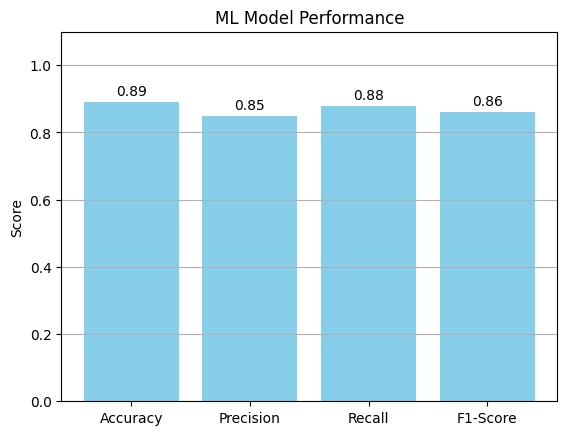

In [23]:
import matplotlib.pyplot as plt  # Required import

# ML Classification Report Visualization
# Simple visual for evaluating models.

# Scenario: Show performance of an ML model using bar plots (accuracy, precision, recall, F1).

# Start a new figure to clear any old settings
plt.figure()

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [0.89, 0.85, 0.88, 0.86]

plt.bar(metrics, values, color='skyblue')
plt.ylim(0, 1.1)  # Y-axis limit set from 0 to 1.1 so the bars and labels fit well.
plt.title("ML Model Performance")
plt.ylabel("Score")

for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
    # Adds the value as text above each bar (e.g., "0.89").
    # v + 0.02 moves the text slightly above the bar top.
    # ha='center' centers the text over the bar.

plt.grid(axis='y')
plt.show()

'''
IoT Mini Project 1: Environmental Sensor Monitoring

Objective:
Visualize real-time environmental data (Temperature, Humidity, and CO₂ levels) collected from an IoT sensor node over 24 hours.
'''


In [27]:
#Simulated Dataset
#We simulate 24 hours of hourly readings from an IoT sensor placed in a smart home environment.
import pandas as pd
import numpy as np

# Create timestamps
time = pd.date_range("2025-01-01 00:00", periods=24, freq='h')
#Creates 24 hourly timestamps starting from Jan 1, 2025, 00:00.freq='h' → 1-hour interval.

# Generate sensor data
np.random.seed(42)
temperature = 22 + 3 * np.sin(np.linspace(0, 2 * np.pi, 24)) + np.random.normal(0, 0.5, 24)
#Simulates a sinusoidal temperature pattern over 24 hours.Adds random noise with standard deviation 0.5.Starts around 22°C and fluctuates ±3°C.
humidity = 50 + 10 * np.cos(np.linspace(0, 2 * np.pi, 24)) + np.random.normal(0, 2, 24)
#Uses a cosine pattern around 50% with ±10% fluctuation.Adds more noise (std=2) for realistic variation.
co2 = 400 + 50 * np.sin(np.linspace(0, 4 * np.pi, 24)) + np.random.normal(0, 20, 24)
#Simulates more frequent oscillation using 4π in sine (2 full cycles).Centered at 400 ppm, with ±50 fluctuations and high noise (std=20).


# Combine into DataFrame
df = pd.DataFrame({
    "Time": time,
    "Temperature (°C)": temperature,
    "Humidity (%)": humidity,
    "CO₂ (ppm)": co2
})

df.head()

,Time,Temperature (°C),Humidity (%),CO₂ (ppm)
0,2025-01-01 00:00:00,22.248357,58.911235,406.872366
1,2025-01-01 01:00:00,22.740258,59.851018,390.718394
2,2025-01-01 02:00:00,23.882596,56.242207,450.875940
3,2025-01-01 03:00:00,24.954023,57.576927,442.181793
4,2025-01-01 04:00:00,24.546579,53.399373,427.310055


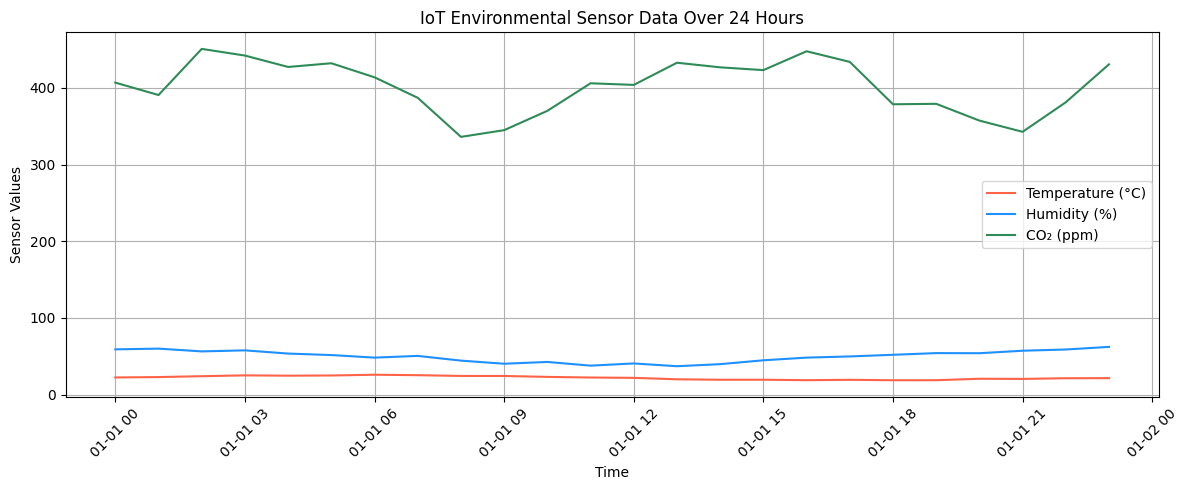

In [29]:
#Visualization with Matplotlib  [Line Plot of All Sensors]
#Displays all 3 sensors on the same timeline.Useful for detecting time-based environmental patterns.

import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 5))  #Creates a new figure with 12 units wide and 5 units high, making it wide enough for time-series data.
plt.plot(df['Time'], df['Temperature (°C)'], label='Temperature (°C)', color='tomato')
plt.plot(df['Time'], df['Humidity (%)'], label='Humidity (%)', color='dodgerblue')
plt.plot(df['Time'], df['CO₂ (ppm)'], label='CO₂ (ppm)', color='seagreen')
'''
These lines plot three different line graphs on the same chart:
  X-axis: df['Time'] (hourly timestamps)
  Y-axis: sensor readings (Temperature, Humidity, CO₂)
'''
plt.title("IoT Environmental Sensor Data Over 24 Hours")
plt.xlabel("Time")
plt.ylabel("Sensor Values")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

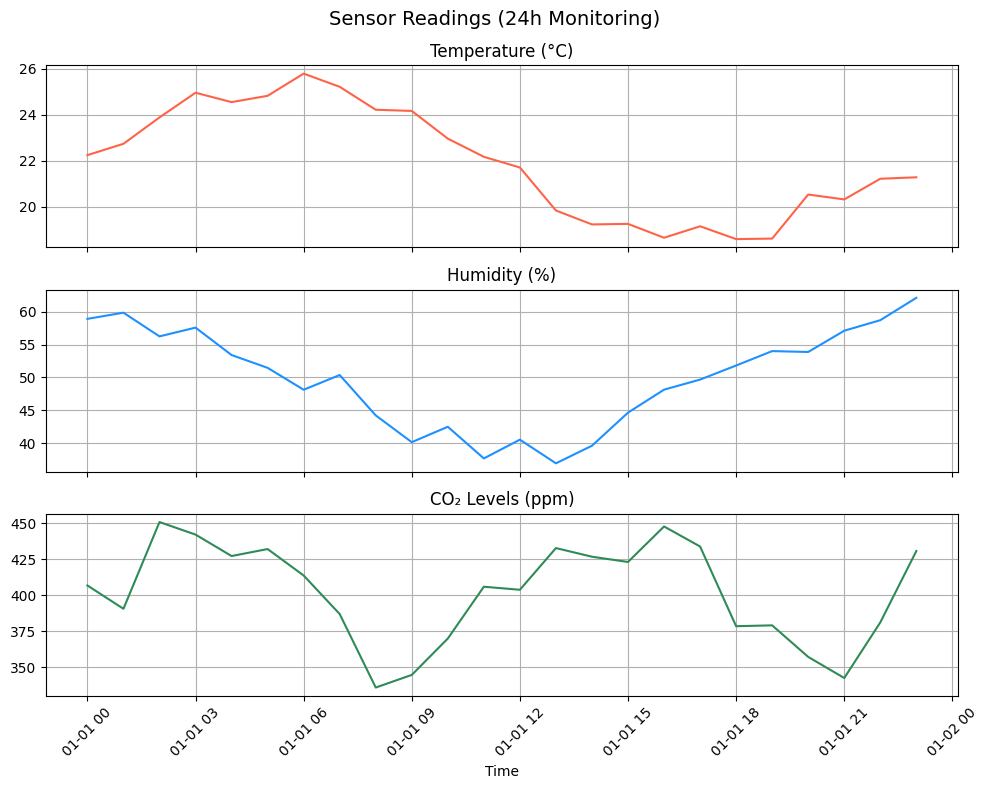

In [30]:
#Subplots for Individual Sensor Trends
#Clear, separated trends per sensor.Great for diagnostics or analytics dashboards.

fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
'''
Creates a figure (fig) with 3 subplots (axs[0], axs[1], axs[2]) arranged vertically (3 rows, 1 column).
figsize=(10, 8) sets the size of the entire figure.
sharex=True makes all subplots share the same x-axis (Time), ensuring alignment across plots.
'''

axs[0].plot(df['Time'], df['Temperature (°C)'], color='tomato')
axs[0].set_title("Temperature (°C)")
axs[0].grid(True)
#Plots temperature data with a tomato-red line.Adds a title for the first subplot.Enables grid lines to help track value changes.

axs[1].plot(df['Time'], df['Humidity (%)'], color='dodgerblue')
axs[1].set_title("Humidity (%)")
axs[1].grid(True)

axs[2].plot(df['Time'], df['CO₂ (ppm)'], color='seagreen')
axs[2].set_title("CO₂ Levels (ppm)")
axs[2].set_xlabel("Time")
axs[2].grid(True)

plt.suptitle("Sensor Readings (24h Monitoring)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

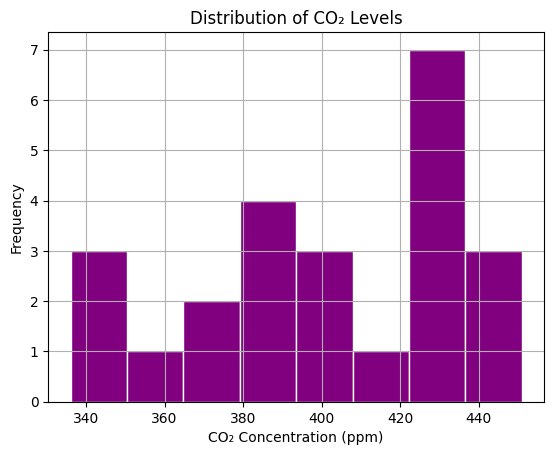

In [32]:
#Histogram of CO₂ Distribution  [Helps identify common levels and outliers in air quality.]
plt.hist(df["CO₂ (ppm)"], bins=8, color='purple', edgecolor='white')
'''
df["CO₂ (ppm)"]: Selects the CO₂ column from the DataFrame.
plt.hist(...): Creates a histogram, which shows how often each range of CO₂ values occurs.
bins=8: Splits the CO₂ value range into 8 equal-width intervals (bars).
color='purple': Sets the color of the bars.
edgecolor='white': Adds white borders to each bar to improve visibility.
'''
plt.title("Distribution of CO₂ Levels")
plt.xlabel("CO₂ Concentration (ppm)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

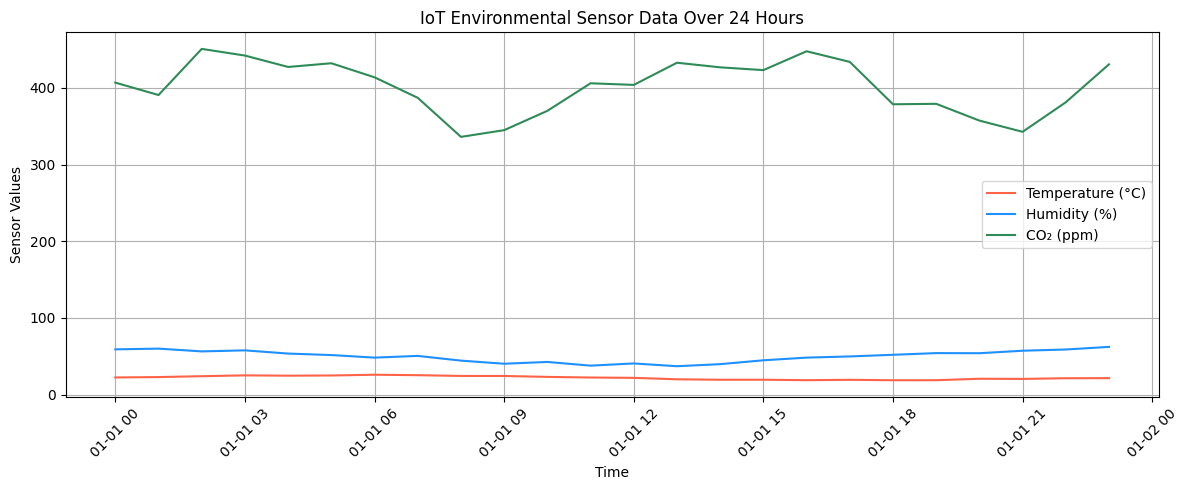

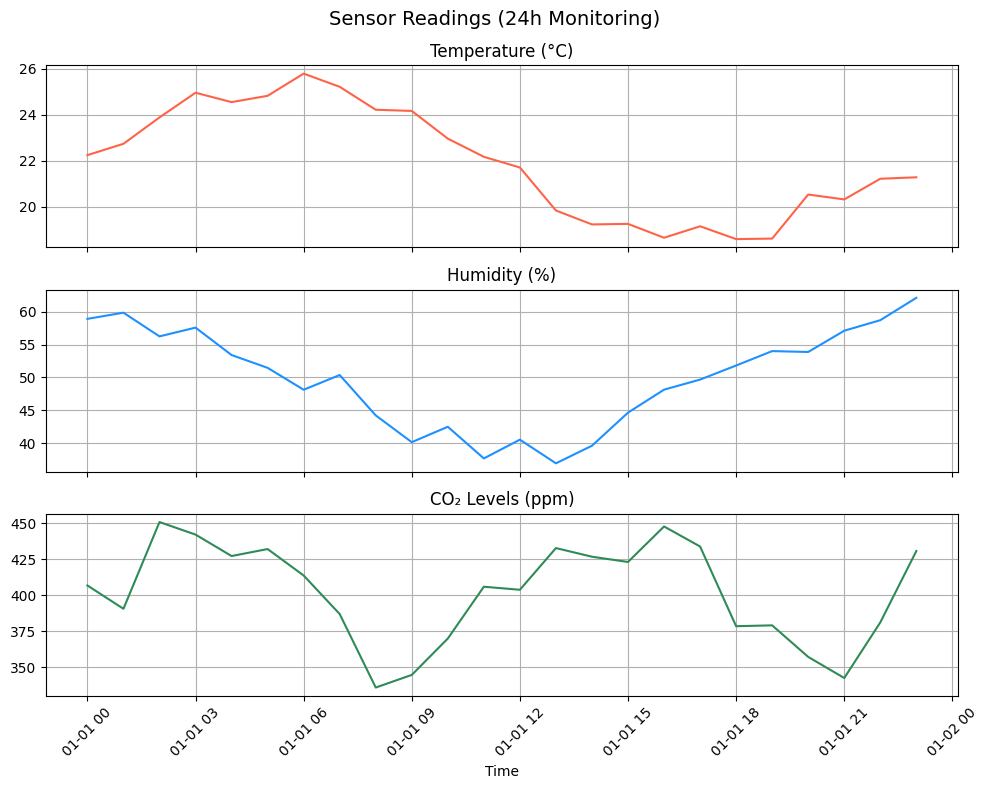

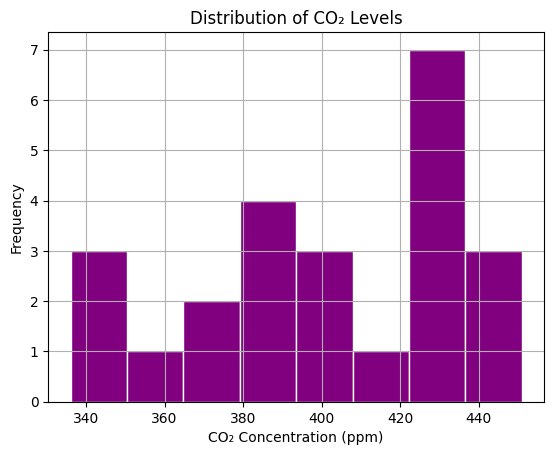

In [34]:
#Full Mini Project: IoT Environmental Sensor Dashboard
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Simulate IoT sensor data (24 hourly samples)
time = pd.date_range("2025-01-01 00:00", periods=24, freq='h')
np.random.seed(42)
temperature = 22 + 3 * np.sin(np.linspace(0, 2 * np.pi, 24)) + np.random.normal(0, 0.5, 24)
humidity = 50 + 10 * np.cos(np.linspace(0, 2 * np.pi, 24)) + np.random.normal(0, 2, 24)
co2 = 400 + 50 * np.sin(np.linspace(0, 4 * np.pi, 24)) + np.random.normal(0, 20, 24)

# Create DataFrame
df = pd.DataFrame({
    "Time": time,
    "Temperature (°C)": temperature,
    "Humidity (%)": humidity,
    "CO₂ (ppm)": co2
})

# 2. Line chart for all sensors
plt.figure(figsize=(12, 5))
plt.plot(df['Time'], df['Temperature (°C)'], label='Temperature (°C)', color='tomato')
plt.plot(df['Time'], df['Humidity (%)'], label='Humidity (%)', color='dodgerblue')
plt.plot(df['Time'], df['CO₂ (ppm)'], label='CO₂ (ppm)', color='seagreen')
plt.title("IoT Environmental Sensor Data Over 24 Hours")
plt.xlabel("Time")
plt.ylabel("Sensor Values")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 3. Subplots for each sensor
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

axs[0].plot(df['Time'], df['Temperature (°C)'], color='tomato')
axs[0].set_title("Temperature (°C)")
axs[0].grid(True)

axs[1].plot(df['Time'], df['Humidity (%)'], color='dodgerblue')
axs[1].set_title("Humidity (%)")
axs[1].grid(True)

axs[2].plot(df['Time'], df['CO₂ (ppm)'], color='seagreen')
axs[2].set_title("CO₂ Levels (ppm)")
axs[2].set_xlabel("Time")
axs[2].grid(True)

plt.suptitle("Sensor Readings (24h Monitoring)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Histogram of CO₂ values
plt.hist(df["CO₂ (ppm)"], bins=8, color='purple', edgecolor='white')
plt.title("Distribution of CO₂ Levels")
plt.xlabel("CO₂ Concentration (ppm)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

'''
ML Mini Project 2: Model Evaluation Visual Dashboard

Objective:

Train a simple classification model and visualize its performance using Matplotlib:
  Accuracy and Confusion Matrix,
  ROC Curve,
  Feature Importance (for tree models).
'''

In [35]:
# Dataset: Iris Classification  [We'll use the built-in Iris dataset for simplicity.]

# Import necessary libraries
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset from scikit-learn
iris = load_iris()

# Extract the features (sepal length, sepal width, etc.)
X = iris.data

# Extract the target labels (0, 1, 2 for Setosa, Versicolor, Virginica)
y = iris.target

# Feature names (column names for the flower measurements)
feature_names = iris.feature_names

# Target class names (actual flower species names)
target_names = iris.target_names

# Create a DataFrame from the features
df = pd.DataFrame(X, columns=feature_names)

# Add a new column to the DataFrame for target labels
df['target'] = y

# Show the first 5 rows of the DataFrame
df.head()

#Explanation:
# - This DataFrame contains 150 rows and 5 columns.
# - 4 columns are numeric features: sepal length, sepal width, petal length, petal width.
# - The 5th column is 'target', which is a number (0, 1, or 2) representing the species.
# - You can later map the 'target' to species names using iris.target_names.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
#Train a Simple Classifier.We use RandomForestClassifier for fast and interpretable results.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


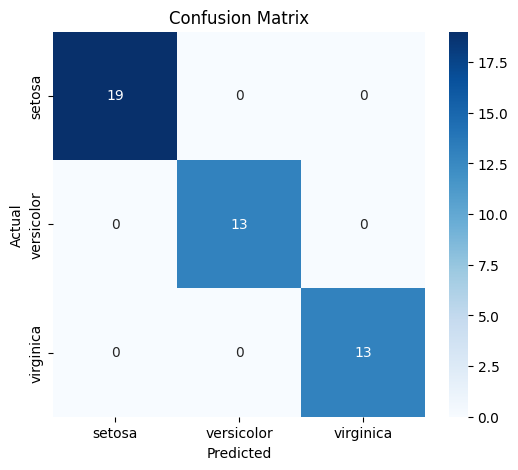

In [37]:
#Visualization    [Confusion Matrix] [Shows how many predictions were right or wrong per class.]

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assume y_test and y_pred are already defined (true and predicted labels from a classifier)

# Generate the confusion matrix from the actual and predicted labels
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 5))  # Set figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,  # Class names on x-axis
            yticklabels=target_names)  # Class names on y-axis

# Label axes and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Display the plot
plt.show()

# Explanation:
# - This heatmap visually compares the predicted and actual class labels.
# - Rows = actual classes, columns = predicted classes.
# - Diagonal values = correct predictions.
# - Off-diagonal values = misclassifications.
# - 'annot=True' displays the actual numbers in each box.
# - Useful to evaluate how well a classifier performed on each class.


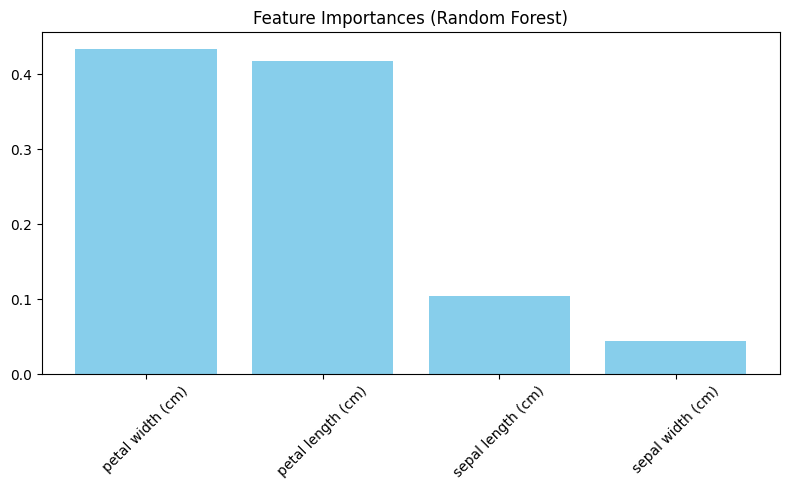

In [40]:
#[Feature Importance Plot] [Tells which features influenced the model most.]
'''
Explanation:
- model.feature_importances_ provides the relative importance of each feature used by the model.
- np.argsort(importances)[::-1] returns indices that would sort importances in descending order.
- Bar plot shows which features contribute most to the model predictions.
- X.shape[1] is the number of features.
- This visualization helps understand which features the model relies on most.
'''

import numpy as np
import matplotlib.pyplot as plt

# 'model' is a trained Random Forest or similar model with feature_importances_ attribute
# Get the importance scores of each feature
importances = model.feature_importances_

# Sort the feature indices by importance (descending order)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))

# Plot bar chart of feature importances, sorted by importance
plt.bar(range(X.shape[1]), importances[indices], color="skyblue")

# Label x-axis ticks with feature names, rotated for readability
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)

plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

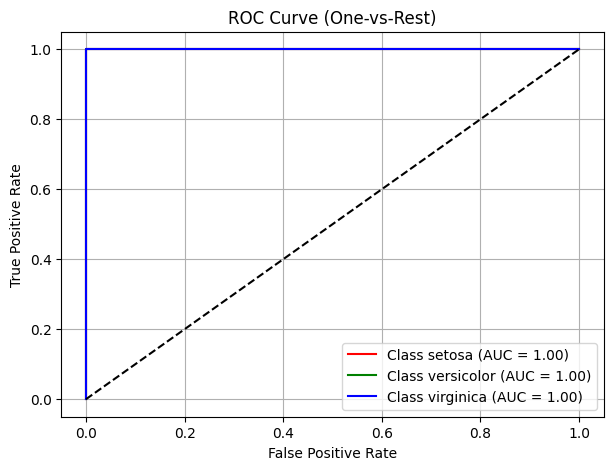

In [41]:
#[ROC Curve (One-vs-Rest)] [Helps compare class-wise performance in probabilistic models]

'''
Explanation:
- ROC curve shows how well the model distinguishes between classes by plotting True Positive Rate vs False Positive Rate.
- Since this is multi-class, each class is treated separately against all others ("one-vs-rest").
- AUC (Area Under Curve) quantifies overall performance: closer to 1 means better.
- This plot helps to evaluate the classifier’s performance for each class individually.
'''

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Convert test labels to a binary format for multi-class ROC computation
# Each class is treated as one-vs-rest (1 if belongs to class, else 0)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Get the predicted probabilities for each class from the model
y_score = model.predict_proba(X_test)

# Initialize dictionaries to store false positive rate, true positive rate, and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and AUC for each class (0, 1, and 2)
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for all three classes
plt.figure(figsize=(7, 5))
colors = ['red', 'green', 'blue']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f'Class {target_names[i]} (AUC = {roc_auc[i]:.2f})')

# Plot a diagonal line for random guessing (baseline)
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One-vs-Rest)")
plt.legend()
plt.grid(True)
plt.show()

'''
Summary

| Metric             | Visual Type   | Why It Helps                   |
| ------------------ | ------------- | ------------------------------ |
| Accuracy           | Scalar output | Overall success                |
| Confusion Matrix   | Heatmap       | Class-wise correct/incorrect   |
| Feature Importance | Bar chart     | Insight into decision features |
| ROC Curve          | Line plot     | Probabilistic model quality    |
'''

✅ Model Accuracy: 1.00


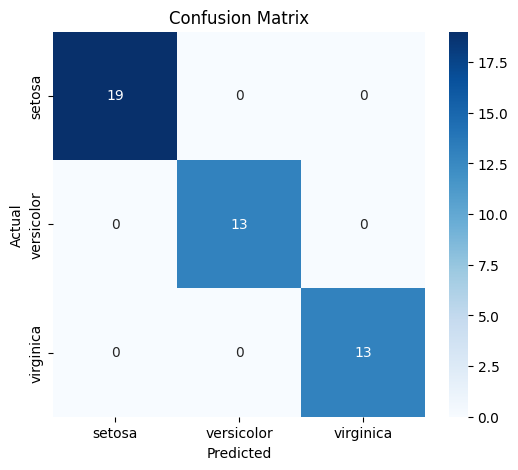

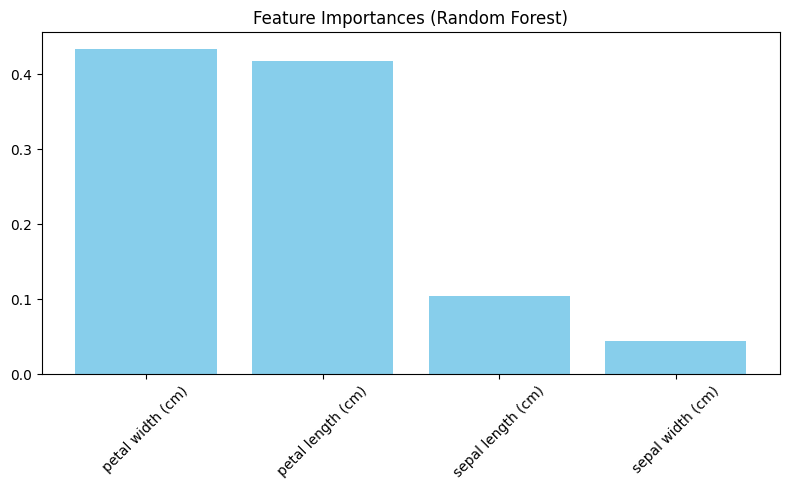

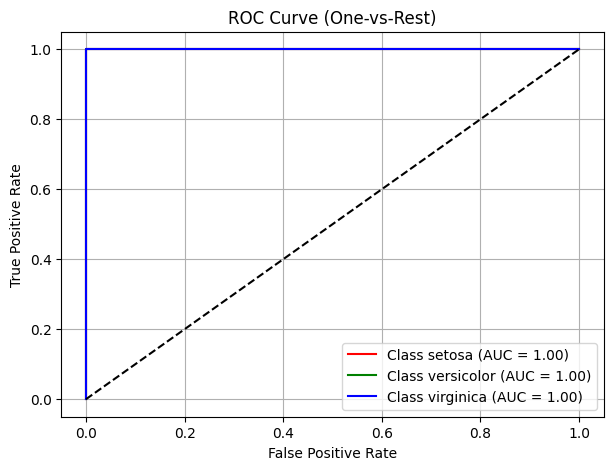

In [43]:
# Iris Classification Full Project - All-in-One Cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Convert to DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Feature Importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8, 5))
plt.bar(range(X.shape[1]), importances[indices], color="skyblue")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

# ROC Curve for Multi-class (One-vs-Rest)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(7, 5))
colors = ['red', 'green', 'blue']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f'Class {target_names[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One-vs-Rest)")
plt.legend()
plt.grid(True)
plt.show()

'''
VLSI Mini Project 3: Chip Test Report Analysis

Objective:
Visualize test results from a fabricated VLSI chip:

Yield rate,
Power distribution,
Delay vs frequency scatter,
Bin analysis (pass/fail/test bin categories).
'''

In [44]:
'''
Simulated Test Data
We'll simulate 1000 chip test entries with:
  Chip ID
  Power consumption (mW)
  Max frequency (MHz)
  Propagation delay (ns)
  Bin result (pass/fail/test category)
'''

import pandas as pd
import numpy as np

np.random.seed(42)  # For reproducibility
num_chips = 1000    # Simulate 1000 chips


df = pd.DataFrame({
    "Chip_ID": np.arange(1, num_chips + 1),                     # Chip IDs: 1 to 1000
    "Power_mW": np.random.normal(loc=75, scale=10, size=1000),  # Avg power = 75 mW ± 10
    "Max_Frequency_MHz": np.random.normal(loc=1200, scale=100, size=1000),  # Avg freq = 1200 MHz ± 100
    "Delay_ns": np.random.normal(loc=1.5, scale=0.2, size=1000),  # Avg delay = 1.5 ns ± 0.2
})
#Each column is filled with 1000 random values generated from a normal distribution (bell curve).

# Categorize chips into bins
df["Bin"] = np.select(
    [
        (df["Power_mW"] > 90) | (df["Delay_ns"] > 1.8),  # Too hot or too slow = FAIL
        (df["Max_Frequency_MHz"] < 1100)                 # Too slow = RETEST
    ],
    ["Fail", "Retest"],       # Labels for those conditions
    default="Pass"            # Otherwise, PASS
)
#Fail: If chip's power > 90 mW OR delay > 1.8 ns, Retest: If chip's frequency < 1100 MHz (might still be okay), Pass: All other cases

df.head()

,Chip_ID,Power_mW,Max_Frequency_MHz,Delay_ns,Bin
0,1,79.967142,1339.935544,1.364964,Pass
1,2,73.617357,1292.463368,1.471096,Pass
2,3,81.476885,1205.963037,1.341516,Pass
3,4,90.230299,1135.306322,1.438408,Fail
4,5,72.658466,1269.822331,1.121277,Pass


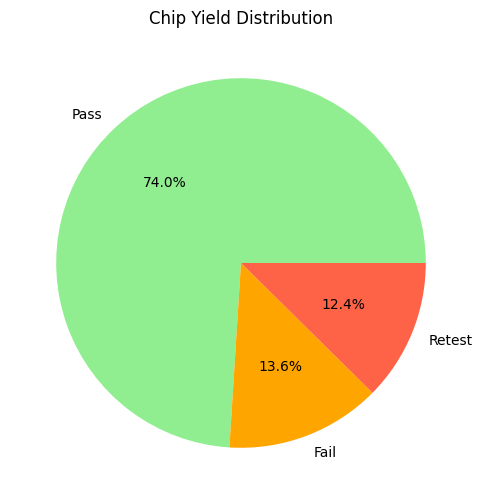

In [45]:
# Visualizations   [a. Yield Pie Chart]
# Shows overall pass/fail/retest rates (yield analysis).

import matplotlib.pyplot as plt

# Count how many chips fall into each category: Pass, Retest, Fail
bin_counts = df["Bin"].value_counts()

# Create a pie chart showing the percentage of chips in each bin
plt.figure(figsize=(6, 6))  # Set the figure size to 6x6 inches

# Plot the pie chart with:
# - labels from bin_counts.index (i.e., ['Pass', 'Fail', 'Retest'])
# - autopct to show % values
# - custom colors for each bin
plt.pie(bin_counts,
        labels=bin_counts.index,
        autopct='%1.1f%%',
        colors=["lightgreen", "orange", "tomato"])

# Add a title
plt.title("Chip Yield Distribution")

# Display the chart
plt.show()

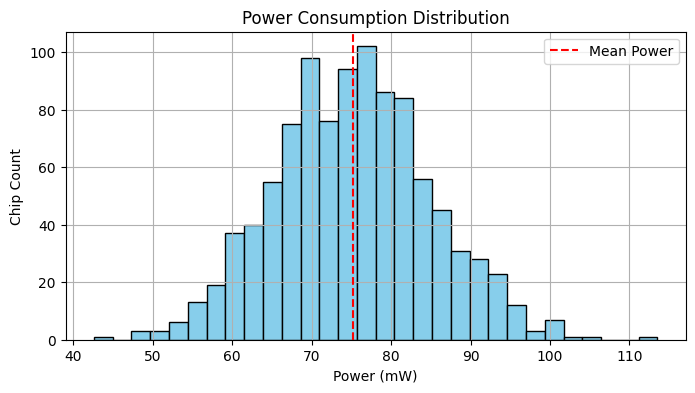

In [46]:
#b.Power Distribution Histogram  [Helps identify if too many chips are consuming excess power.]
import matplotlib.pyplot as plt

# Set the figure size to 8x4 inches
plt.figure(figsize=(8, 4))

# Plot a histogram of chip power consumption
# - bins=30: divides the data into 30 intervals
# - color='skyblue': bar color
# - edgecolor='black': black border for bars
plt.hist(df["Power_mW"], bins=30, color='skyblue', edgecolor='black')

# Draw a red dashed vertical line at the mean power value
plt.axvline(df["Power_mW"].mean(), color='red', linestyle='--', label='Mean Power')

# Add chart title and axis labels
plt.title("Power Consumption Distribution")
plt.xlabel("Power (mW)")
plt.ylabel("Chip Count")

# Show the legend for the red mean line
plt.legend()

# Add grid for better readability
plt.grid(True)

# Display the plot
plt.show()

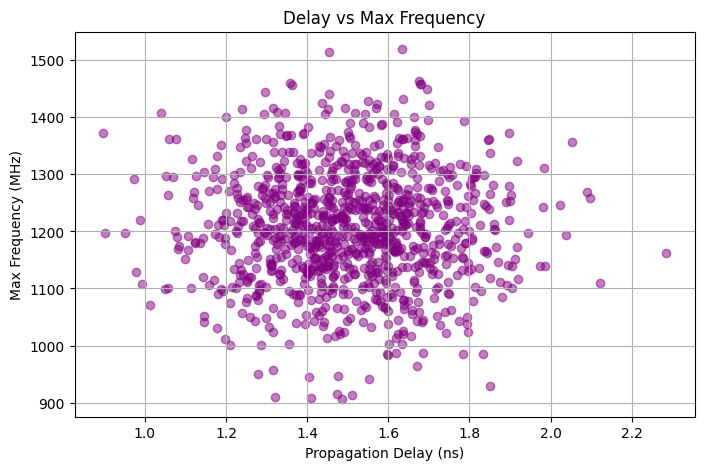

In [47]:
#c. Delay vs Frequency Scatter Plot (Speed Analysis)  [Helps spot timing violations or performance trends.]
plt.figure(figsize=(8, 5))  # Set figure size to 8x5 inches

# Create a scatter plot:
# - X-axis: Propagation Delay (ns)
# - Y-axis: Max Frequency (MHz)
# - c='purple': purple-colored dots
# - alpha=0.5: semi-transparent dots for better visibility if points overlap
plt.scatter(df["Delay_ns"], df["Max_Frequency_MHz"], c='purple', alpha=0.5)

# Add title and axis labels
plt.title("Delay vs Max Frequency")
plt.xlabel("Propagation Delay (ns)")
plt.ylabel("Max Frequency (MHz)")

# Add grid lines for better readability
plt.grid(True)

# Show the plot
plt.show()

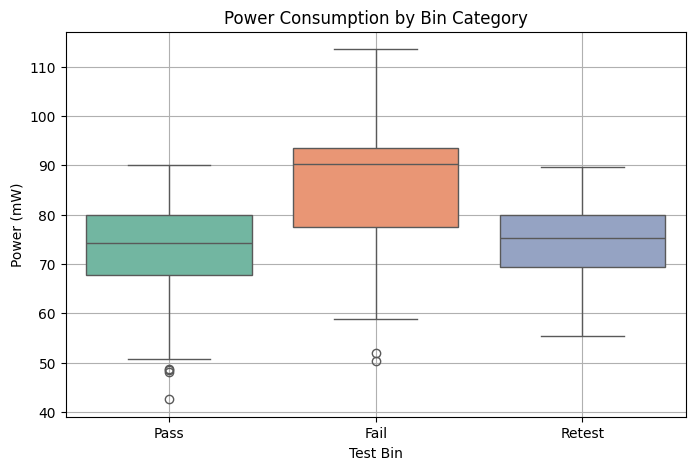

In [49]:
#d. Box Plot by Bin Type  [Insight into variation of power across test results.]
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))  # Set the plot size

# Create a boxplot showing Power_mW distribution for each Bin category (Pass, Retest, Fail)
# - x: Bin categories
# - y: Power values
# - palette: Set2 gives a nice set of distinct colors
sns.boxplot(x="Bin", y="Power_mW", hue="Bin", data=df, palette="Set2", legend=False)

# Add labels and title
plt.title("Power Consumption by Bin Category")
plt.xlabel("Test Bin")
plt.ylabel("Power (mW)")

# Add grid lines for readability
plt.grid(True)

# Display the plot
plt.show()

# Simple Explanation:
# This boxplot shows how power consumption differs for chips in each bin (Pass, Retest, Fail).
# You can compare medians, spread, and outliers across categories.

'''
Summary

| Analysis Type           | Visualization Tool | Purpose                     |
| ----------------------- | ------------------ | --------------------------- |
| Yield/Quality           | Pie Chart          | Summary of production yield |
| Power Spread            | Histogram          | Chip-to-chip variation      |
| Speed-Delay Correlation | Scatter Plot       | Understand timing impact    |
| Category Insight        | Box Plot           | Test bin distribution       |
'''

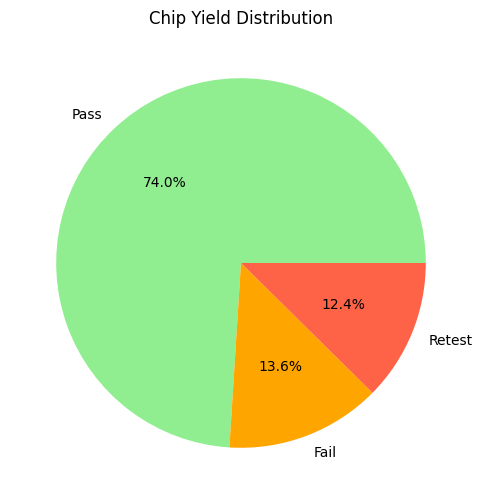

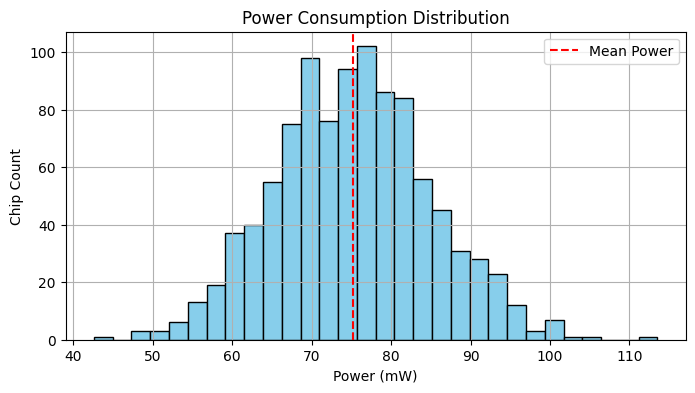

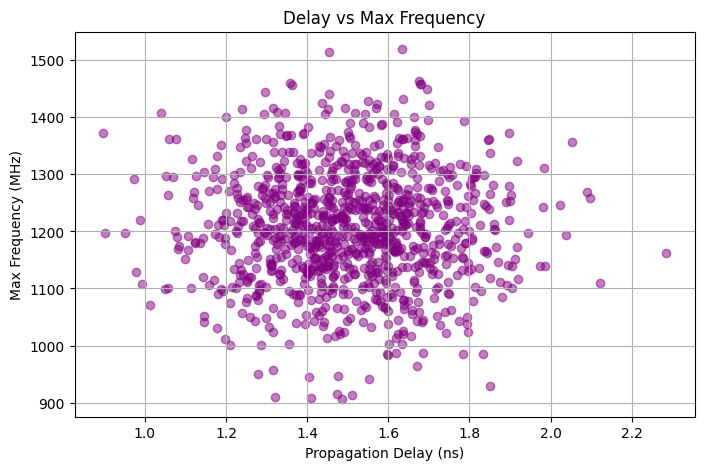

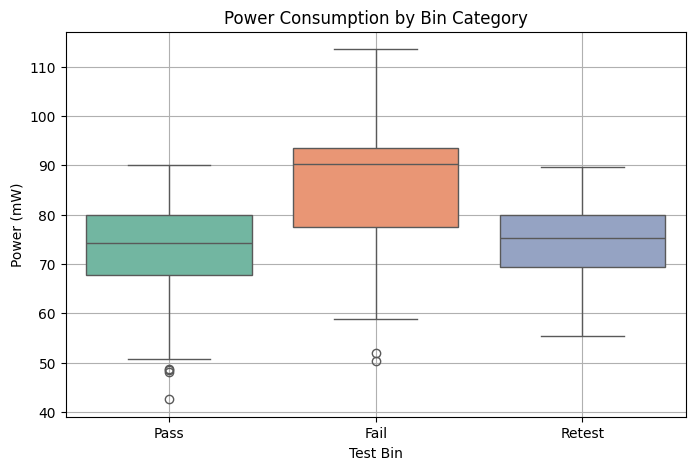

In [50]:
#Entire VLSI Chip Test Report Analysis mini-project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate VLSI chip test data
np.random.seed(42)
num_chips = 1000

df = pd.DataFrame({
    "Chip_ID": np.arange(1, num_chips + 1),
    "Power_mW": np.random.normal(loc=75, scale=10, size=num_chips),       # 75 ±10 mW
    "Max_Frequency_MHz": np.random.normal(loc=1200, scale=100, size=num_chips),  # 1200 ±100 MHz
    "Delay_ns": np.random.normal(loc=1.5, scale=0.2, size=num_chips),     # 1.5 ±0.2 ns
})

# Step 2: Categorize chips into test bins
df["Bin"] = np.select(
    [
        (df["Power_mW"] > 90) | (df["Delay_ns"] > 1.8),  # High power or high delay
        (df["Max_Frequency_MHz"] < 1100)                 # Low frequency
    ],
    ["Fail", "Retest"],
    default="Pass"
)

# Step 3: Pie chart of bin distribution
bin_counts = df["Bin"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(bin_counts, labels=bin_counts.index, autopct='%1.1f%%',
        colors=["lightgreen", "orange", "tomato"])
plt.title("Chip Yield Distribution")
plt.show()

# Step 4: Histogram of power consumption
plt.figure(figsize=(8, 4))
plt.hist(df["Power_mW"], bins=30, color='skyblue', edgecolor='black')
plt.axvline(df["Power_mW"].mean(), color='red', linestyle='--', label='Mean Power')
plt.title("Power Consumption Distribution")
plt.xlabel("Power (mW)")
plt.ylabel("Chip Count")
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Scatter plot of delay vs max frequency
plt.figure(figsize=(8, 5))
plt.scatter(df["Delay_ns"], df["Max_Frequency_MHz"], c='purple', alpha=0.5)
plt.title("Delay vs Max Frequency")
plt.xlabel("Propagation Delay (ns)")
plt.ylabel("Max Frequency (MHz)")
plt.grid(True)
plt.show()

# Step 6: Box plot of power by bin category (updated for future Seaborn)
plt.figure(figsize=(8, 5))
sns.boxplot(x="Bin", y="Power_mW", hue="Bin", data=df, palette="Set2", legend=False)
plt.title("Power Consumption by Bin Category")
plt.xlabel("Test Bin")
plt.ylabel("Power (mW)")
plt.grid(True)
plt.show()